In [0]:
# w200112_train300K_prep.ipynb
# 200112(일) 01:59~
# 천성욱

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 목표: 모델의 예측값을 얻기 위해서, 300K train.csv를 전처리한다.

In [0]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 217kB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 2.3MB 43.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [0]:
from konlpy.tag import Okt

okt = Okt()
' '.join(okt.morphs('하이 안녕 그래놀라먹고그래놀랐나?'))

'하이 안녕 그래 놀라 먹고 그래 놀랐나 ?'

In [0]:
import pandas as pd
df_train = pd.read_csv('/content/drive/My Drive/금융문자/데이터/ansi_train.csv', encoding='cp949')
df_train.head()

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


# okt.morphs 연산속도 확인하기

In [0]:
import time#

time_i = time.time()
ser_prep_test = df_train['text'][:100].apply(lambda x: ' '.join(okt.morphs(x)))
print(time.time() - time_i)
ser_prep_test.head()

3.3666300773620605


0                    XXX 은행 성산 XXX 팀 장 입니다 . 행복한주말 되세요
1    오늘 도 많이 웃으시는 하루 시작 하세요 XXX 은행 진 월동 VIP 라운지 XXX 올림
2    안녕하십니까 고객 님 . XXX 은행 입니다 . 금일 납부 하셔야 할 금액 은 15...
3    XXX 고객 님 안녕하세요 XXX 은행 XXX 지점 입니다지난 한 해 동안 저희 X...
4    1월 은 새 로움 이 가득 XXX 입니다 . 올 한해 더 많이 행복 한 한해 되시길...
Name: text, dtype: object

In [0]:
import time
time_i = time.time()
ser_prep_test = df_train['text'][:1000].apply(lambda x: ' '.join(okt.morphs(x)))
print(time.time() - time_i)
ser_prep_test.head()

16.12891936302185


0                    XXX 은행 성산 XXX 팀 장 입니다 . 행복한주말 되세요
1    오늘 도 많이 웃으시는 하루 시작 하세요 XXX 은행 진 월동 VIP 라운지 XXX 올림
2    안녕하십니까 고객 님 . XXX 은행 입니다 . 금일 납부 하셔야 할 금액 은 15...
3    XXX 고객 님 안녕하세요 XXX 은행 XXX 지점 입니다지난 한 해 동안 저희 X...
4    1월 은 새 로움 이 가득 XXX 입니다 . 올 한해 더 많이 행복 한 한해 되시길...
Name: text, dtype: object

In [0]:
import matplotlib.pyplot as plt

l_idxf_time = list()
for idx_f in [10,50, 100, 500, 1000, 5000]:
    time_i = time.time()
    ser_prep_test = df_train['text'][:idx_f].apply(lambda x: ' '.join(okt.morphs(x)))
    time_d = time.time() - time_i
    print(time_d)
    l_idxf_time.append([idx_f, time_d])

In [0]:
import numpy as np
nar_idxf_time = np.array(l_idxf_time)


array([5000.        ,   66.47583151])

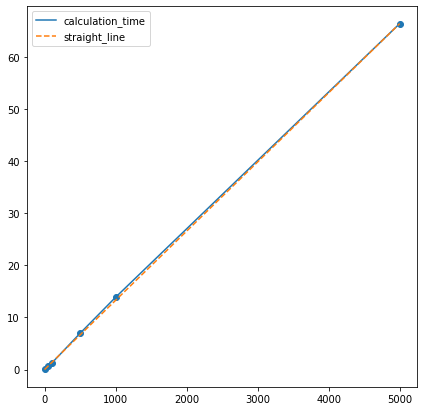

In [0]:
# 계산시간은 샘플 수의 선형임을 알 수 있다.
# 샘플당 약
plt.figure(figsize=(7,7))
plt.scatter([item[0] for item in l_idxf_time], [item[1] for item in l_idxf_time])
plt.plot([item[0] for item in l_idxf_time], [item[1] for item in l_idxf_time], label='calculation_time')
plt.plot([0,np.max(nar_idxf_time, axis=0)[0]],
         [0,np.max(nar_idxf_time, axis=0)[1]], '--', label='straight_line')
plt.legend()
plt.show()

## [전처리] 정규표현식

In [0]:
import re
re_pat_space = re.compile('\s{2,}')
import re
re_pat_words = re.compile('[^가-힣a-zA-Z0-9\s]')
import re
re_pat_XX_XXX = re.compile('X{2,}')
print(re_pat_XX_XXX.sub(' ', 
        re_pat_space.sub(' ', 
        re_pat_words.sub('', 
            '!@#$% example !@#$ XX고객님 XXX지점 XXX입니다. 안녕  하세       요X'))))

 example  고객님  지점  입니다 안녕 하세 요X


In [0]:
# text_wsx : Whitespace, special characters, X{2,}
import time
time_i = time.time()

df_train['text_wsx'] = df_train['text'].apply(lambda x: re_pat_XX_XXX.sub(' ', re_pat_space.sub(' ', re_pat_words.sub('', x))))
display(df_train.head())
print(time.time() - time_i)

,id,year_month,text,smishing,text_wsx
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0,은행성산 팀장입니다행복한주말되세요
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0,오늘도많이웃으시는하루시작하세요 은행 진월동VIP라운지 올림
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0,안녕하십니까 고객님 은행입니다금일 납부하셔야 할 금액은 153600원 입니다감사합...
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0,고객님안녕하세요 은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에...
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0,1월은 새로움이 가득 입니다올 한해 더 많이행복한 한해되시길바랍니다


4.56464409828186


In [0]:
# text_okt : Okt() 로 토크나이징
# 예상 소요시간 60분(실제 4171sec)
import time
time_i = time.time()

df_train['text_okt'] = df_train['text_wsx'].apply(lambda x: ' '.join(okt.morphs(x)))
display(df_train.head())
print(time.time() - time_i)

,id,year_month,text,smishing,text_wsx,text_okt
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0,은행성산 팀장입니다행복한주말되세요,은행 성산 팀 장 입니다 행복한주말 되세요
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0,오늘도많이웃으시는하루시작하세요 은행 진월동VIP라운지 올림,오늘 도 많이 웃으시는 하루 시작 하세요 은행 진 월동 VIP 라운지 올림
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0,안녕하십니까 고객님 은행입니다금일 납부하셔야 할 금액은 153600원 입니다감사합...,안녕하십니까 고객 님 은행 입니다 금일 납부 하셔야 할 금액 은 153600원 입니...
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0,고객님안녕하세요 은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에...,고객 님 안녕하세요 은행 지점 입니다지난 한 해 동안 저희 지점 에 보내주신 성원 ...
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0,1월은 새로움이 가득 입니다올 한해 더 많이행복한 한해되시길바랍니다,1월 은 새 로움 이 가득 입니다 올 한해 더 많이 행복 한 한해 되시길 바랍니다


4171.395719528198


In [0]:
!pwd

/content


In [0]:
df_train.to_csv('/content/drive/My Drive/금융문자/데이터/train_csv_wsx_okt.csv', index=False)

# Okt와 BERT tokenizer와의 호환성 확인

In [0]:
!pip install transformers
from transformers import BertTokenizer

In [0]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [0]:
# text_okt : Okt() 로 토크나이징
# 예상 소요시간 60분(실제 4171sec)
import time
time_i = time.time()

# df_train['tok_bert'] = df_train['text_okt'].apply(lambda x: ' '.join(okt.morphs(x)))
# display(df_train.head())
display(df_train['text_okt'][:10000].apply(lambda x: tokenizer.tokenize(x)))

print(time.time() - time_i)

0       [은, ##행, 성, ##산, 팀, 장, 입, ##니다, 행, ##복, ##한, #...
1       [오, ##늘, 도, 많이, 웃, ##으, ##시, ##는, 하, ##루, 시, #...
2       [안, ##녕, ##하, ##십, ##니, ##까, 고, ##객, 님, 은, ##행...
3       [고, ##객, 님, 안, ##녕, ##하, ##세, ##요, 은, ##행, 지, ...
4       [1월, 은, 새, 로, ##움, 이, 가, ##득, 입, ##니다, 올, 한, #...
                              ...                        
9995    [고, ##객, 님, 안, ##녕, ##하, ##세, ##요, 은, ##행, 광, ...
9996    [무, ##지, ##개, 김, ##선, 입, ##니다, 엄, ##청, 추, 입, #...
9997    [고, ##객, 님, 은, ##행, 김, 지, ##점, 입, ##니다, 2017년,...
9998    [새, ##로, ##이, 근, ##무, 하, 게, 된, 부, 지, ##점, 장, 입...
9999    [고, ##객, 님, 의, 귀, ##중, ##한, 자, ##산, 맡, ##겨, ##...
Name: text_okt, Length: 10000, dtype: object

8.146979093551636


In [0]:
# text_okt : Okt() 로 토크나이징
# 03:48~ 04:23 예상종료시간
# 예상 소요시간 35분(실제 1892)
import time
time_i = time.time()

df_train['tok_bert'] = df_train['text_okt'].apply(lambda x: ' '.join(okt.morphs(x)))
display(df_train.head())
print(time.time() - time_i)

,id,year_month,text,smishing,text_wsx,text_okt,tok_bert
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0,은행성산 팀장입니다행복한주말되세요,은행 성산 팀 장 입니다 행복한주말 되세요,은행 성산 팀 장 입니다 행복한주말 되세요
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0,오늘도많이웃으시는하루시작하세요 은행 진월동VIP라운지 올림,오늘 도 많이 웃으시는 하루 시작 하세요 은행 진 월동 VIP 라운지 올림,오늘 도 많이 웃으시는 하루 시작 하세요 은행 진 월동 VIP 라운지 올림
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0,안녕하십니까 고객님 은행입니다금일 납부하셔야 할 금액은 153600원 입니다감사합...,안녕하십니까 고객 님 은행 입니다 금일 납부 하셔야 할 금액 은 153600원 입니...,안녕하십니까 고객 님 은행 입니다 금일 납부 하셔야 할 금액 은 153600원 입니...
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0,고객님안녕하세요 은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에...,고객 님 안녕하세요 은행 지점 입니다지난 한 해 동안 저희 지점 에 보내주신 성원 ...,고객 님 안녕하세요 은행 지점 입니다지난 한 해 동안 저희 지점 에 보내주신 성원 ...
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0,1월은 새로움이 가득 입니다올 한해 더 많이행복한 한해되시길바랍니다,1월 은 새 로움 이 가득 입니다 올 한해 더 많이 행복 한 한해 되시길 바랍니다,1월 은 새 로움 이 가득 입니다 올 한해 더 많이 행복 한 한해 되시길 바랍니다


1892.793244600296


In [0]:
df_train.to_csv('/content/drive/My Drive/금융문자/데이터/train_csv_wsx_oktX2.csv', index=False)

In [0]:
# text_okt : Okt() 로 토크나이징
# 04:47~ 04:51 예상종료시간
# 예상 소요시간 4.5분(실제 4171sec)
import time
time_i = time.time()

df_train['tok_bert'] = df_train['text_okt'].apply(lambda x: tokenizer.tokenize(x))
display(df_train.head())
print(time.time() - time_i)

,id,year_month,text,smishing,text_wsx,text_okt,tok_bert
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0,은행성산 팀장입니다행복한주말되세요,은행 성산 팀 장 입니다 행복한주말 되세요,"[은, ##행, 성, ##산, 팀, 장, 입, ##니다, 행, ##복, ##한, #..."
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0,오늘도많이웃으시는하루시작하세요 은행 진월동VIP라운지 올림,오늘 도 많이 웃으시는 하루 시작 하세요 은행 진 월동 VIP 라운지 올림,"[오, ##늘, 도, 많이, 웃, ##으, ##시, ##는, 하, ##루, 시, #..."
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0,안녕하십니까 고객님 은행입니다금일 납부하셔야 할 금액은 153600원 입니다감사합...,안녕하십니까 고객 님 은행 입니다 금일 납부 하셔야 할 금액 은 153600원 입니...,"[안, ##녕, ##하, ##십, ##니, ##까, 고, ##객, 님, 은, ##행..."
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0,고객님안녕하세요 은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에...,고객 님 안녕하세요 은행 지점 입니다지난 한 해 동안 저희 지점 에 보내주신 성원 ...,"[고, ##객, 님, 안, ##녕, ##하, ##세, ##요, 은, ##행, 지, ..."
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0,1월은 새로움이 가득 입니다올 한해 더 많이행복한 한해되시길바랍니다,1월 은 새 로움 이 가득 입니다 올 한해 더 많이 행복 한 한해 되시길 바랍니다,"[1월, 은, 새, 로, ##움, 이, 가, ##득, 입, ##니다, 올, 한, #..."


204.43267464637756


In [0]:
df_train.to_csv('/content/drive/My Drive/금융문자/데이터/train_csv_wsx_okt_BertTok.csv', index=False)

## 결과

In [0]:
# id 5번 문장과 같이
# "1월 은 새 로움 이 가득 입니다 올 한해 더 많이 행복 한 한해 되시길 바랍니다"
# [1월, 은, 새, 로, ##움, 이, 가, ##득, 입, ##니다, 올, 한, #...
# okt는 chatspace 패키지와 다르게 ' '.join 방식으로 텍스를 붙이게 되면, 무엇을 붙이고 뗄지에 대해서 추가적인 처리가 필요하다.

# 은 >>> ##은
# 로 >>> ##로
# ...

# text_okt 단계에 [CLS] [SEP] 토큰 추가하기

In [0]:
import re
def f_re_pat(x):
#     print('before :', x)
    re_pat_ending = re.compile('(니다)|(세요)|(시오)')
    idx = 0
    for i in range(10):
#         print(idx, x[idx:])
        tmp_search = re_pat_ending.search(x[idx:])
        if tmp_search!=None:
            idx = tmp_search.end() +idx
            x = x[:idx] + ' [SEP]' + x[idx:]
#             print('after  :', x)
            idx += 6    # len(' [SEP]')
        else:
#             print('None')
            break
    if x[-6:] != ' [SEP]':    # 마지막 문장을 if문으로 판단하여, [SEP]를 넣어준다.
        x = x + ' [SEP]'
    return '[CLS] ' + x
print(' '.join(okt.morphs(f_re_pat(df_train['text'][2]))))
print(f_re_pat(df_train['text_okt'][2]))
f_re_pat(df_train['text'][2]) == f_re_pat(df_train['text_okt'][2])
# f_re_pat('안녕하세요. 입니다.')

[ CLS ] 안녕하십니까 고객 님 . XXX 은행 입니다 [ SEP ]. 금일 납부 하셔야 할 금액 은 153600원 입니다 [ SEP ]. 감사합니다 [ SEP ]. 새해 복 많이 받으십시오 [ SEP ]. XXX 은행 옥포 XXX 올림 [ SEP ]
[CLS] 안녕하십니까 고객 님 은행 입니다 [SEP] 금일 납부 하셔야 할 금액 은 153600원 입니다 [SEP] 감사합니다 [SEP] 새해 복 많이 받으십시오 [SEP] 은행 옥포 올림 [SEP]


False

In [0]:
tmp = [0,1,2,3]
tmp.insert(1,'hi')
tmp

[0, 'hi', 1, 2, 3]

In [0]:
# 실험 후 되돌릴 때 사용할 수 있음
df_train['tok_bert'][2] = tokenizer.tokenize(df_train['text_wsx'][2])
df_train['tok_bert'][2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
def f_insert_special_token(l_tokens):
    l_conditions = ['##니다', '##세요', '##시오', '##까']
    l_idx = list()
    for idx, token in enumerate(l_tokens):
        if token in l_conditions: l_idx.append(idx)
    for lcnt, idx in enumerate(l_idx):
        l_tokens.insert(lcnt+idx+1, '[SEP]')
    if l_tokens[-1] != '[SEP]': l_tokens.append('[SEP]')
    return ['[CLS]'] + l_tokens

df_train['tok_bert'][2] = tokenizer.tokenize(df_train['text_wsx'][2])   # 실험 후 되돌릴 때 사용됨.
print(df_train['tok_bert'][2])
print(f_insert_special_token(df_train['tok_bert'][2]))

['안', '##녕', '##하', '##십', '##니', '##까', '고', '##객', '##님', '은', '##행', '##입', '##니다', '##금', '##일', '납', '##부', '##하', '##셔', '##야', '할', '금', '##액', '##은', '1536', '##00', '##원', '입', '##니다', '##감', '##사', '##합', '##니다', '새', '##해', '복', '많이', '받', '##으', '##십', '##시', '##오', '은', '##행', '##옥', '##포', '올', '##림']
['[CLS]', '안', '##녕', '##하', '##십', '##니', '##까', '[SEP]', '고', '##객', '##님', '은', '##행', '##입', '##니다', '[SEP]', '##금', '##일', '납', '##부', '##하', '##셔', '##야', '할', '금', '##액', '##은', '1536', '##00', '##원', '입', '##니다', '[SEP]', '##감', '##사', '##합', '##니다', '[SEP]', '새', '##해', '복', '많이', '받', '##으', '##십', '##시', '##오', '은', '##행', '##옥', '##포', '올', '##림', '[SEP]']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
df_train['tok_bert'][2] = tokenizer.tokenize(df_train['text_wsx'][2])   # 실험 후 되돌릴 때 사용됨.
df_train['tok_bert'][:5].apply(f_insert_special_token)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    [[CLS], 은, ##행, 성, ##산, 팀, 장, 입, ##니다, [SEP], ...
1    [[CLS], 오, ##늘, 도, 많이, 웃, ##으, ##시, ##는, 하, ##...
2    [[CLS], 안, ##녕, ##하, ##십, ##니, ##까, [SEP], 고, ...
3    [[CLS], 고, ##객, 님, 안, ##녕, ##하, ##세, ##요, 은, #...
4    [[CLS], 1월, 은, 새, 로, ##움, 이, 가, ##득, 입, ##니다, ...
Name: tok_bert, dtype: object

In [0]:
df_train.to_csv('/content/drive/My Drive/금융문자/데이터/train_csv_wsx_okt_BertTok_SEP.csv', index=False)

## BERT tokenizer 평균 토큰 개수 구하기

In [0]:
# text_okt : Okt() 로 토크나이징
# 04:47~ 04:51 예상종료시간
# 예상 소요시간 4.5분(실제 4171sec)
import time
time_i = time.time()

df_train['nb_toks'] = df_train['tok_bert'].apply(lambda x: len(x))
display(df_train.head())
print(time.time() - time_i)

,id,year_month,text,smishing,text_wsx,text_okt,tok_bert,nb_toks
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0,은행성산 팀장입니다행복한주말되세요,은행 성산 팀 장 입니다 행복한주말 되세요,"[은, ##행, 성, ##산, 팀, 장, 입, ##니다, [SEP], [SEP], ...",21
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0,오늘도많이웃으시는하루시작하세요 은행 진월동VIP라운지 올림,오늘 도 많이 웃으시는 하루 시작 하세요 은행 진 월동 VIP 라운지 올림,"[오, ##늘, 도, 많이, 웃, ##으, ##시, ##는, 하, ##루, 시, #...",27
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0,안녕하십니까 고객님 은행입니다금일 납부하셔야 할 금액은 153600원 입니다감사합...,안녕하십니까 고객 님 은행 입니다 금일 납부 하셔야 할 금액 은 153600원 입니...,"[안, ##녕, ##하, ##십, ##니, ##까, [SEP], 고, ##객, ##...",53
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0,고객님안녕하세요 은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에...,고객 님 안녕하세요 은행 지점 입니다지난 한 해 동안 저희 지점 에 보내주신 성원 ...,"[고, ##객, 님, 안, ##녕, ##하, ##세, ##요, 은, ##행, 지, ...",117
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0,1월은 새로움이 가득 입니다올 한해 더 많이행복한 한해되시길바랍니다,1월 은 새 로움 이 가득 입니다 올 한해 더 많이 행복 한 한해 되시길 바랍니다,"[1월, 은, 새, 로, ##움, 이, 가, ##득, 입, ##니다, [SEP], ...",34


0.19584965705871582


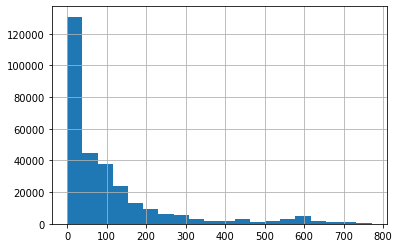

In [0]:
df_train['nb_toks'].hist(bins=20)

count    18703.000000
mean       525.949206
std        142.661964
min         15.000000
25%        421.000000
50%        580.000000
75%        615.000000
max        771.000000
Name: nb_toks, dtype: float64
(582.0, 619.8]    4864
(544.2, 582.0]    2209
(619.8, 657.6]    1672
(506.4, 544.2]    1437
(695.4, 733.2]    1277
(279.6, 317.4]    1216
(657.6, 695.4]     946
(468.6, 506.4]     801
(317.4, 355.2]     786
(355.2, 393.0]     754
(393.0, 430.8]     613
(204.0, 241.8]     573
(430.8, 468.6]     496
(241.8, 279.6]     461
(733.2, 771.0]     277
(166.2, 204.0]     206
(128.4, 166.2]      95
(52.8, 90.6]         9
(14.243, 52.8]       6
(90.6, 128.4]        5
Name: nb_toks, dtype: int64


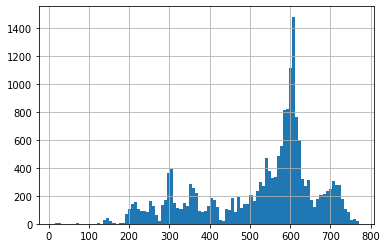

In [0]:
print(df_train[df_train['smishing']==1]['nb_toks'].describe())
print(df_train[df_train['smishing']==1]['nb_toks'].value_counts(bins=20))
df_train[df_train['smishing']==1]['nb_toks'].hist(bins=100)

count    277242.000000
mean         83.565326
std          88.866519
min           0.000000
25%          26.000000
50%          47.000000
75%         110.000000
max         710.000000
Name: nb_toks, dtype: float64
(-0.711, 35.5]    128396
(35.5, 71.0]       40002
(71.0, 106.5]      36418
(106.5, 142.0]     26117
(142.0, 177.5]     14655
(177.5, 213.0]      9463
(213.0, 248.5]      6504
(248.5, 284.0]      4331
(284.0, 319.5]      3237
(426.0, 461.5]      2292
(319.5, 355.0]      1807
(390.5, 426.0]      1013
(532.5, 568.0]       986
(355.0, 390.5]       956
(461.5, 497.0]       548
(497.0, 532.5]       240
(568.0, 603.5]       142
(603.5, 639.0]        75
(639.0, 674.5]        31
(674.5, 710.0]        29
Name: nb_toks, dtype: int64


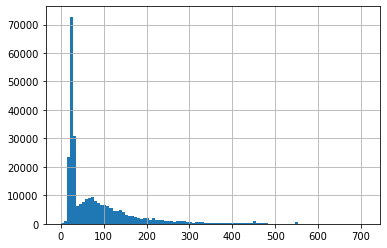

In [0]:
print(df_train[df_train['smishing']==0]['nb_toks'].describe())
print(df_train[df_train['smishing']==0]['nb_toks'].value_counts(bins=20))
df_train[df_train['smishing']==0]['nb_toks'].hist(bins=100)

# UNK 밀도 구하기

In [0]:
[1,1,1,2,3,4].count(1)

3

In [0]:
# text_okt : Okt() 로 토크나이징
# 04:47~ 04:51 예상종료시간
# 예상 소요시간 4.5분(실제 4171sec)
import time
time_i = time.time()

df_train['dense_UNK'] = df_train['tok_bert'].apply(lambda x: x.count('[UNK]')/(len(x) -x.count('[SEP]') -1 + 10**(-12)))
df_train['rel_UNK'] = df_train.apply(lambda row: row['tok_bert'].count('[UNK]')/(len(row['text_okt']) + 10**(-12)), axis=1)
display(df_train.head())
print(time.time() - time_i)

,id,year_month,text,smishing,text_wsx,text_okt,tok_bert,nb_toks,dense_UNK,rel_UNK
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0,은행성산 팀장입니다행복한주말되세요,은행 성산 팀 장 입니다 행복한주말 되세요,"[은, ##행, 성, ##산, 팀, 장, 입, ##니다, [SEP], [SEP], ...",21,0.0,0.0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0,오늘도많이웃으시는하루시작하세요 은행 진월동VIP라운지 올림,오늘 도 많이 웃으시는 하루 시작 하세요 은행 진 월동 VIP 라운지 올림,"[오, ##늘, 도, 많이, 웃, ##으, ##시, ##는, 하, ##루, 시, #...",27,0.0,0.0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0,안녕하십니까 고객님 은행입니다금일 납부하셔야 할 금액은 153600원 입니다감사합...,안녕하십니까 고객 님 은행 입니다 금일 납부 하셔야 할 금액 은 153600원 입니...,"[안, ##녕, ##하, ##십, ##니, ##까, [SEP], 고, ##객, ##...",53,0.0,0.0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0,고객님안녕하세요 은행 지점입니다지난 한 해 동안 저희 지점에 보내주신 성원에...,고객 님 안녕하세요 은행 지점 입니다지난 한 해 동안 저희 지점 에 보내주신 성원 ...,"[고, ##객, 님, 안, ##녕, ##하, ##세, ##요, 은, ##행, 지, ...",117,0.0,0.0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0,1월은 새로움이 가득 입니다올 한해 더 많이행복한 한해되시길바랍니다,1월 은 새 로움 이 가득 입니다 올 한해 더 많이 행복 한 한해 되시길 바랍니다,"[1월, 은, 새, 로, ##움, 이, 가, ##득, 입, ##니다, [SEP], ...",34,0.0,0.0


10.5758376121521


(-0.002, 0.05]    294629
(0.05, 0.1]         1183
(0.1, 0.15]           97
(0.15, 0.2]           12
(0.2, 0.25]            8
(0.3, 0.35]            7
(0.25, 0.3]            6
(0.5, 0.55]            2
(0.95, 1.0]            1
(0.55, 0.6]            0
(0.9, 0.95]            0
(0.4, 0.45]            0
(0.35, 0.4]            0
(0.6, 0.65]            0
(0.65, 0.7]            0
(0.7, 0.75]            0
(0.75, 0.8]            0
(0.8, 0.85]            0
(0.85, 0.9]            0
(0.45, 0.5]            0
Name: dense_UNK, dtype: int64
(-0.001075, 0.00375]    267018
(0.00375, 0.0075]        13661
(0.0075, 0.0112]          6204
(0.0112, 0.015]           2346
(0.0225, 0.0262]          2229
(0.0187, 0.0225]          1367
(0.0262, 0.03]            1143
(0.015, 0.0187]           1117
(0.03, 0.0337]             429
(0.0337, 0.0375]           135
(0.0412, 0.045]             76
(0.0375, 0.0412]            59
(0.045, 0.0487]             53
(0.0487, 0.0525]            49
(0.0525, 0.0562]            32
(0.05

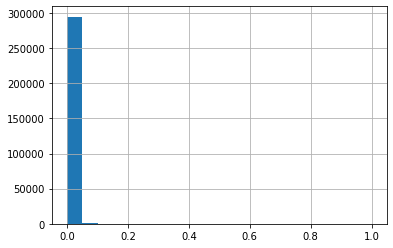

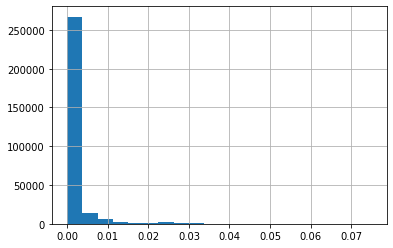

In [0]:
import matplotlib.pyplot as plt

print(df_train['dense_UNK'].value_counts(bins=20))
print(df_train['rel_UNK'].value_counts(bins=20))
df_train['dense_UNK'].hist(bins=20)
plt.show()
df_train['rel_UNK'].hist(bins=20)

In [0]:
pd.set_option('display.max.row', 200)
df_train[df_train['dense_UNK']>=0.1].sort_values(by='dense_UNK').reset_index()

,index,id,year_month,text,smishing,text_wsx,text_okt,tok_bert,nb_toks,dense_UNK
0,16524,19309,2017-02,어깨도 쫘악가슴도 쫘악마음도 쫘악얼굴도 활짝 펴서 오늘도 화이팅 하세요!!!! ...,0,어깨도 쫘악가슴도 쫘악마음도 쫘악얼굴도 활짝 펴서 오늘도 화이팅 하세요 은행신도림...,어깨 도 쫘악가슴 도 쫘악마음 도 쫘악얼굴 도 활짝 펴서 오늘 도 화이팅 하세요 은...,"[어, ##깨, 도, [UNK], 도, [UNK], 도, [UNK], 도, 활, #...",30,0.103448
1,126643,146244,2017-08,아침저녁으로 쌀쌀한 바람이 붑니다.여름이 물러가나봅니다.,0,아침저녁으로 쌀쌀한 바람이 붑니다여름이 물러가나봅니다,아침 저녁 으로 쌀쌀한 바람 이 붑니다 여름 이 물러가나 봅니다,"[아, ##침, 저, ##녁, 으로, 쌀, ##쌀, ##한, 바, ##람, 이, [...",20,0.105263
2,132338,152415,2017-08,아침저녁으로시원한바람이붑니다.여름이물러가나봅니다XXX-XXX-XXX,0,아침저녁으로시원한바람이붑니다여름이물러가나봅니다,아침 저녁 으로 시원한 바람 이 붑니다 여름 이 물러가나 봅니다,"[아, ##침, 저, ##녁, 으로, 시, ##원, ##한, 바, ##람, 이, [...",20,0.105263
3,154240,177037,2017-09,낮에는 맴맴저녁에는 귀뚤귀뚤XXX입니다.감기조심하세요XXX은행 XXX,0,낮에는 맴맴저녁에는 귀뚤귀뚤 입니다감기조심하세요 은행,낮 에는 맴맴 저녁 에는 귀뚤귀뚤 입니다 감기 조심하세요 은행,"[낮, 에, ##는, [UNK], 저, ##녁, 에, ##는, [UNK], 입, #...",20,0.105263
4,170011,194720,2017-10,날씨는 춥지만 마은은 따뜻한 당신이기를 빌어봅니다. -XXX올림,0,날씨는 춥지만 마은은 따뜻한 당신이기를 빌어봅니다 올림,날씨 는 춥지만 마은 은 따뜻한 당 신 이기 를 빌어 봅니다 올림,"[날, ##씨, 는, [UNK], 마, ##은, 은, 따, ##뜻, ##한, 당, ...",20,0.105263
5,35601,41665,2017-04,오늘뵙게되어기뻤습니다.편안한저녁시간되세요XXX나주권XXX올림,0,오늘뵙게되어기뻤습니다편안한저녁시간되세요 나주권 올림,오늘 뵙게 되어 기뻤습니다 편안한 저녁 시간 되세요 나주 권 올림,"[오, ##늘, [UNK], 되어, [UNK], 편, ##안, ##한, 저, ##녁...",20,0.105263
6,577,636,2017-01,어깨도 쫘악가슴도 쫘악마음도 쫘악얼굴도 활짝펴서오늘도 화이팅 하세요XXX은행월곡역X...,0,어깨도 쫘악가슴도 쫘악마음도 쫘악얼굴도 활짝펴서오늘도 화이팅 하세요 은행월곡역 올림,어깨 도 쫘악가슴 도 쫘악마음 도 쫘악얼굴 도 활짝 펴서 오늘 도 화이팅 하세요 은...,"[어, ##깨, 도, [UNK], 도, [UNK], 도, [UNK], 도, 활, #...",29,0.107143
7,8492,9562,2017-02,어깨도쫘악가슴도쫘악마음도쫘악오늘도활짝웃는기분좋은날되세요XXX청계XXX,0,어깨도쫘악가슴도쫘악마음도쫘악오늘도활짝웃는기분좋은날되세요 청계,어깨 도 쫘악 가슴 도 쫘악 마음 도 쫘악 오늘 도 활짝 웃는 기분좋은날 되세요 청계,"[어, ##깨, 도, [UNK], 가, ##슴, 도, [UNK], 마, ##음, 도...",29,0.107143
8,74260,86688,2017-05,신록의계절5월푸르름을만끽하는주말되세요XXX미XXX올림.,0,신록의계절5월푸르름을만끽하는주말되세요 미 올림,신록 의 계절 5월 푸르름을만끽하는주말되세요 미 올림,"[신, ##록, 의, 계, ##절, 5월, [UNK], 미, 올, ##림]",10,0.111111
9,120314,139414,2017-07,7월도수고많으셨습니다.덥지만즐겁게마무리하시고8월엔더좋은일이가득XXX,0,7월도수고많으셨습니다덥지만즐겁게마무리하시고8월엔더좋은일이가득,7월 도수고많으셨습니다덥지만즐겁게마무리하시고 8월 엔더좋은일이가득,"[7월, [UNK], 8월, 엔, ##더, ##좋, ##은, ##일, ##이가, ##득]",10,0.111111


In [0]:
df_train[df_train['rel_UNK']>=0.05].sort_values(by='rel_UNK').reset_index()

,index,id,year_month,text,smishing,text_wsx,text_okt,tok_bert,nb_toks,dense_UNK,rel_UNK
0,108962,126682,2017-06,오늘도 넉넉함과 여유로움이 가득한 날되세요소중한거래 고맙습니다XXX,0,오늘도 넉넉함과 여유로움이 가득한 날되세요소중한거래 고맙습니다,오늘 도 넉넉함과 여유 로움 이 가득한 날 되세요 소중한거래 고맙습니다,"[오, ##늘, 도, [UNK], 여, ##유, 로, ##움, 이, 가, ##득, ...",22,0.095238,0.051282
1,259427,294380,2018-08,XXX주안지점XXX입니다. 무덥기만하던 여름도 한풀꺽인행복한주말되세요,0,주안지점 입니다 무덥기만하던 여름도 한풀꺽인행복한주말되세요,주안 지점 입니다 무덥기만 하던 여름 도 한풀 꺽 인 행복한주말 되세요,"[주, ##안, 지, ##점, 입, ##니다, [UNK], 하, ##던, 여, ##...",24,0.086957,0.051282
2,4879,5405,2017-01,1년중가장춥다는XXX입니다생각보다많이춥진않지만건강유의하세요XXX,0,1년중가장춥다는 입니다생각보다많이춥진않지만건강유의하세요,1년 중가장춥다는 입니다 생각 보다 많이 춥진 않지만 건강 유의 하세요,"[1, ##년, [UNK], 입, ##니다, 생, ##각, 보다, 많이, [UNK]...",19,0.111111,0.051282
3,256959,291601,2018-08,XXX주안지점XXX입니다. 무덥기만하던 여름도 한풀꺽인 행복한주말되세요,0,주안지점 입니다 무덥기만하던 여름도 한풀꺽인 행복한주말되세요,주안 지점 입니다 무덥기만 하던 여름 도 한풀 꺽 인 행복한주말 되세요,"[주, ##안, 지, ##점, 입, ##니다, [UNK], 하, ##던, 여, ##...",24,0.086957,0.051282
4,125782,145313,2017-07,희망은 쉬는시간!없으면 힘들잖아요.힘들땐 잠시 쉬어가세요.XXX당진 문제XXX,0,희망은 쉬는시간없으면 힘들잖아요힘들땐 잠시 쉬어가세요 당진 문제,희망 은 쉬는시간 없으면 힘들잖아요 힘들 땐 잠시 쉬어가세요 당진 문제,"[희, ##망, 은, 쉬, ##는, ##시간, 없, ##으면, [UNK], 힘, #...",23,0.090909,0.051282
5,150723,173067,2017-09,덥지도 춥지도 않은 가을 날씨 느긋하게 즐기는 하루되세요XXX보문동XXX올림.,0,덥지도 춥지도 않은 가을 날씨 느긋하게 즐기는 하루되세요 보문동 올림,덥지도 춥지도 않은 가을 날씨 느긋하게 즐기는 하루 되세요 보문동 올림,"[[UNK], [UNK], 않은, 가, ##을, 날, ##씨, 느, ##긋, ##하...",22,0.095238,0.051282
6,141756,163028,2017-09,시원한바람이가을분위기를물씬냅니다.가을이오나봅니다.행복하세요XXX,0,시원한바람이가을분위기를물씬냅니다가을이오나봅니다행복하세요,시원한 바람이가을 분위기 를 물씬 냅니다 가을 이오나 봅니다 행복하세요,"[시, ##원, ##한, 바, ##람, ##이가, ##을, 분, ##위, ##기, ...",25,0.083333,0.051282
7,55449,64792,2017-04,소중한시간 내점해주셔서 고맙습니다 또 뵙길 바라겠습니다!! 국XXX XXX팀장,0,소중한시간 내점해주셔서 고맙습니다 또 뵙길 바라겠습니다 국 팀장,소중한 시간 내 점 해주셔서 고맙습니다 또 뵙길 바라겠습니다 국 팀 장,"[소, ##중, ##한, 시, ##간, 내, 점, 해, ##주, ##셔, ##서, ...",22,0.095238,0.051282
8,130773,150727,2017-08,아침저녁으로시원한바람이붑니다여름이물러가나봅니다XXX동진주XXX,0,아침저녁으로시원한바람이붑니다여름이물러가나봅니다 동진주,아침 저녁 으로 시원한 바람 이 붑니다 여름 이 물러가나 봅니다 동진주,"[아, ##침, 저, ##녁, 으로, 시, ##원, ##한, 바, ##람, 이, [...",23,0.090909,0.051282
9,126470,146054,2017-08,첫 단추를 잘 꿰는 월 만드세요,0,첫 단추를 잘 꿰는 월 만드세요,첫 단추 를 잘 꿰 는 월 만드세요,"[첫, 단, ##추, 를, 잘, [UNK], 는, 월, 만, ##드, ##세, ##요]",12,0.090909,0.052632
